# Neural Network

In [52]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [53]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [54]:
#len(X_train)
len(X_test)

10000

In [55]:
#X_train[0].shape
X_train.shape

(60000, 28, 28)

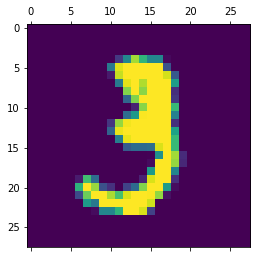

In [56]:
plt.matshow(X_train[10])

### tiền xử lý

In [57]:
#Scale values (normalize)
X_train = X_train / 255
X_test = X_test / 255

In [58]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [59]:
X_train_flattened.shape
X_test_flattened.shape

(10000, 784)

## NN không có hidden layout

In [60]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4709 - accuracy: 0.8759
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3037 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2835 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2735 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2664 - accuracy: 0.9257


In [61]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2665 - accuracy: 0.9254


[0.2664712965488434, 0.9254000186920166]

In [62]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([3.3176377e-02, 2.9099041e-07, 4.6023458e-02, 9.5414037e-01,
       3.3174956e-03, 1.3389982e-01, 1.4076788e-06, 9.9978948e-01,
       8.8319272e-02, 7.1540815e-01], dtype=float32)

#### test 1 image

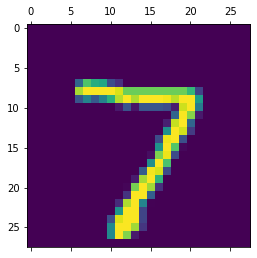

In [63]:
plt.matshow(X_test[0])

In [64]:
np.argmax(y_predicted[0])

7

In [65]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [66]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [67]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    1,    0,    8,    5,    3,    1,    1],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   6,    9,  921,   17,    8,    5,   13,   10,   38,    5],
       [   3,    0,   16,  920,    0,   29,    2,   12,   19,    9],
       [   1,    1,    4,    1,  916,    0,    9,    4,    9,   37],
       [   9,    2,    3,   24,   10,  787,   12,    8,   29,    8],
       [   8,    3,    6,    1,    8,   19,  908,    2,    3,    0],
       [   1,    6,   22,    6,    8,    0,    0,  950,    2,   33],
       [   8,    6,    6,   21,    9,   32,    9,   10,  860,   13],
       [  11,    7,    1,   10,   23,    8,    0,   22,    4,  923]])>

#### visualize

Text(69.0, 0.5, 'Truth')

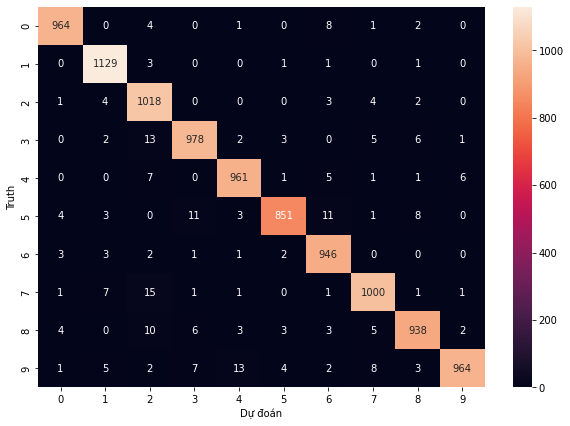

In [81]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Dự đoán')
plt.ylabel('Truth')

## NN sử dụng hidden layout

In [69]:
model = keras.Sequential([
    #keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2748 - accuracy: 0.9226
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1275 - accuracy: 0.9630
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0878 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0664 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0532 - accuracy: 0.9833


In [70]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0859 - accuracy: 0.9749


[0.08588388562202454, 0.9749000072479248]

In [71]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

313/313 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    4,    0,    1,    0,    8,    1,    2,    0],
       [   0, 1129,    3,    0,    0,    1,    1,    0,    1,    0],
       [   1,    4, 1018,    0,    0,    0,    3,    4,    2,    0],
       [   0,    2,   13,  978,    2,    3,    0,    5,    6,    1],
       [   0,    0,    7,    0,  961,    1,    5,    1,    1,    6],
       [   4,    3,    0,   11,    3,  851,   11,    1,    8,    0],
       [   3,    3,    2,    1,    1,    2,  946,    0,    0,    0],
       [   1,    7,   15,    1,    1,    0,    1, 1000,    1,    1],
       [   4,    0,   10,    6,    3,    3,    3,    5,  938,    2],
       [   1,    5,    2,    7,   13,    4,    2,    8,    3,  964]])>

Text(69.0, 0.5, 'Truth')

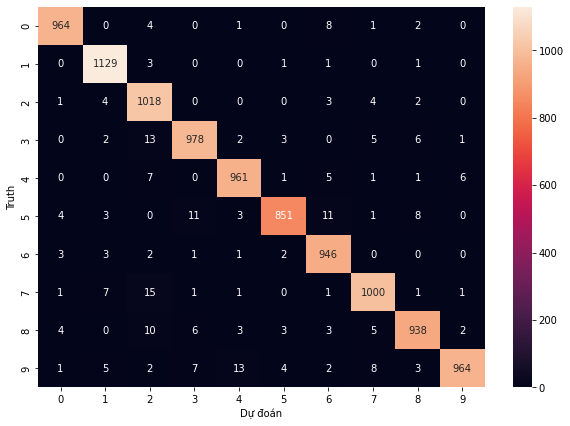

In [72]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Dự đoán')
plt.ylabel('Truth')